# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
print(soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [10]:
# Extract all rows of data
rows = soup.find_all('div', class_= 'container-fluid')

for row in rows:
    print(row.get_text())


Mars Temperature Data
This is Mars data.


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0




### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data = []
rows = soup.find_all('tr')

# Loop through the scraped data to create a list of rows

for row in rows[1:]:
    columns = row.find_all('td')
    if columns:
        data.append({
            'id': columns[0].get_text(strip=True),
            'terrestrial_date':columns[1].get_text(strip=True),
            'sol': columns[2].get_text(strip=True),
            'ls': columns[3].get_text(strip=True),
            'month': columns[4].get_text(strip=True),
            'min_temp': columns[5].get_text(strip=True),
            'pressure': columns[6].get_text(strip=True)
        })

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [13]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [19]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int) 
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [21]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
months

12

In [35]:
# 2. How many sols (Martian days) worth of data are there?
sols = df['sol'].nunique() 
sols

1867

In [36]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df['min_temp'].mean()
avg_min_temp

-76.12104981253347

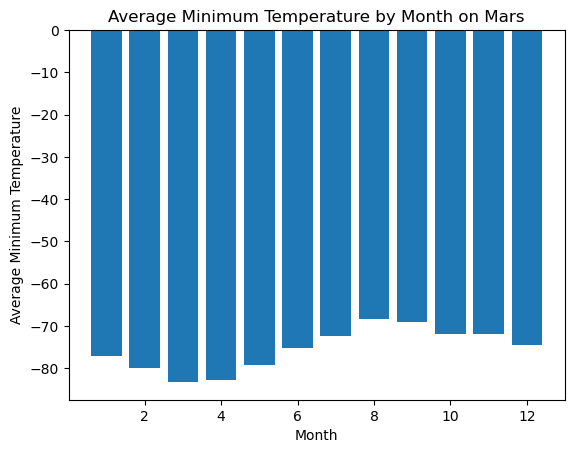

In [49]:
# Plot the average minimum temperature by month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

In [54]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
sorted_months = avg_min_temp_by_month.sort_values()

coldest_months = sorted_months.head()
hottest_month = sorted_months.tail()

print(f"coldest months: {coldest_months}")
print(f"hottest months: {hottest_month}")

coldest months: month
3   -83.307292
4   -82.747423
2   -79.932584
5   -79.308725
1   -77.160920
Name: min_temp, dtype: float64
hottest months: month
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


In [57]:
# 4. What is the average pressure by month?
avg_pressure_monthly = df.groupby('month')['pressure'].mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

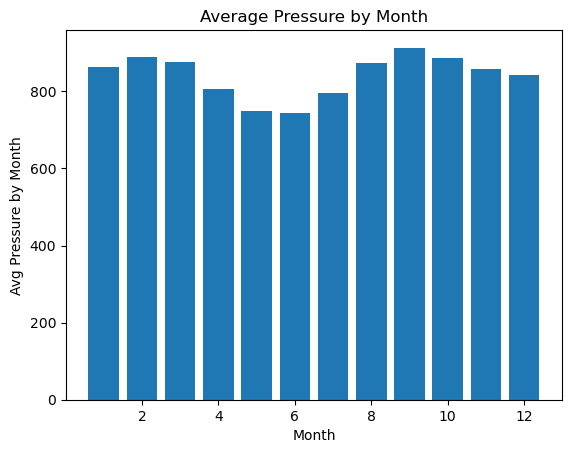

In [62]:
# Plot the average pressure by month
avg_pressure_monthly = df.groupby('month')['pressure'].mean()
plt.bar(avg_pressure_monthly.index, avg_pressure_monthly.values)
plt.xlabel('Month')
plt.ylabel('Avg Pressure by Month')
plt.title('Average Pressure by Month')
plt.show()

In [65]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_monthly = df.groupby('month')['pressure'].mean()

avg_pressure_monthly.sort_values()
lowest_pressure = avg_pressure_monthly.head()
highest_pressure = avg_pressure_monthly.tail()
print(f"lowest pressure: {lowest_pressure}")
print(f"highest pressure: {highest_pressure}")

lowest pressure: month
1    862.488506
2    889.455056
3    877.322917
4    806.329897
5    748.557047
Name: pressure, dtype: float64
highest pressure: month
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


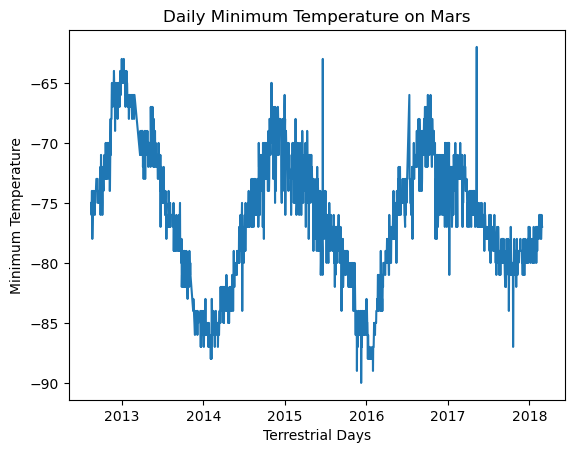

In [76]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

I examined the daily minimum temperatures on Mars as recorded by the Curiosity rover. By plotting and analyzing these values, I aimed to observe seasonal temperature patterns and fluctuations across a Martian year

#### Atmospheric Pressure

I investigated the daily atmospheric pressure measurements recorded by the Curiosity rover on Mars. Analyzing these values helps reveal Mars' atmospheric behavior, including seasonal variations, which could impact future missions and studies on the planet's habitability

#### Year Length

I aimed to estimate the duration of a Martian year in Earth days. This can be achieved by examining seasonal cycles in key environmental data, such as temperature and atmospheric pressure, which reflect the planet’s position and distance from the Sun throughout its orbit.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [77]:
# Write the data to a CSV
df.to_csv('filename.csv', index=False)

In [78]:
browser.quit()